In [93]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 12.0)

## Meniscus
### Linear
Want to find the shape of the equilibrium surface for a fluid, density $\rho$, in an infinitely long glass vessel of width a. The air-fluid interface has a surface tension $\gamma_{air}$ and the glass-fluid interface has surface tension $\gamma_{glass}$.

Let the surface profile be $z = Z(x)$ due to the linear symmetry. The Energy per unit length is:

$$ E = E_{top} + E_{side} $$

$$ E_{top} = \int_{top}dS (\gamma_{air} + \frac{1}{2}\rho g z) = \int_{x = 0}^a (\gamma_{air} + \frac{1}{2}\rho g z)\sqrt{1 + (z')^2}dr$$

$$ E_{side} = \int_{side}dS \; \gamma_{glass}  = Z(R) \; \gamma_{glass} $$


In [9]:
#use a high order polynomial ansatz starting from a flat function
x0 = [0, 0, 0, 1]
def E(f):
    gamma_glass = 1.0
    gamma_air = 1.0
    rho = 1000.0
    g = 9.81
    

Help on function polyval in module numpy.lib.polynomial:

polyval(p, x)
    Evaluate a polynomial at specific values.
    
    If `p` is of length N, this function returns the value:
    
        ``p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]``
    
    If `x` is a sequence, then `p(x)` is returned for each element of `x`.
    If `x` is another polynomial then the composite polynomial `p(x(t))`
    is returned.
    
    Parameters
    ----------
    p : array_like or poly1d object
       1D array of polynomial coefficients (including coefficients equal
       to zero) from highest degree to the constant term, or an
       instance of poly1d.
    x : array_like or poly1d object
       A number, a 1D array of numbers, or an instance of poly1d, "at"
       which to evaluate `p`.
    
    Returns
    -------
    values : ndarray or poly1d
       If `x` is a poly1d instance, the result is the composition of the two
       polynomials, i.e., `x` is "substituted" in `p` and the sim

### Cylindrical
Want to find the shape of the equilibrium surface for a fluid, density $\rho$, in a cylindrical glass vessel, radius R. The air-fluid interface has a surface tension $\gamma_{air}$ and the glass-fluid interface has surface tension $\gamma_{glass}$. 

If the glass has a hydrophobic coating one would expect $\gamma_{glass} > \gamma_{air}$ and the meniscus to curve downwards, minimising the contact between the glass and the fluid. 

Using cylindrical coords $(r, \phi, z)$. Assuming that the solution is cylindrically symmetric, we define it by: 

$$z = Z(r), 0 < r < R $$ 

The energy functional is then an integral over the top surface that takes care of the potential energy and the energy of the air-fluid interface and an integral over the side that takes care of the glass-fluid interface.

$$ E = E_{top} + E_{side} $$

$$ E_{top} = \int_{top}dS (\gamma_{air} + \frac{1}{2}\rho g z)$$

$$ E_{side} = \int_{side}dS \; \gamma_{glass}  = 2\pi R \; Z(R) \; \gamma_{glass} $$

Taking a surface element with side lengths $da$ in the radial direction and $db$ in the angular direction.

$$dS = da \; db $$

$$da = \sqrt{dr^2 + (\frac{dz}{dr}dr)^2} = \sqrt{1 + \frac{dz}{dr}^2} dr$$

$$db = \sqrt{(rd\phi)^2 + (\frac{dz}{d\phi}d\phi)^2} = \sqrt{r^2 + \frac{dz}{d\phi}^2} d\phi = r d\phi$$


$$ E_{top} = 2\pi\int_{r = 0}^R (\gamma_{air} + \frac{1}{2}\rho g z) (\sqrt{1 + (z')^2} r dr) $$

$$E = \int_{r = 0}^R f(z, z') dr$$

$$f(z,z') = 2\pi (\gamma_{air} + \frac{1}{2}\rho g z) (\sqrt{1 + \frac{dz}{dr}^2} r) + 2\pi R \gamma_{glass}Z(r)\delta(r-R) $$

We need to add the constraint that the volume is constant:

$$ V = 2\pi \int_{r = 0}^R rz \; dr $$

So the integrand of the function we need to minimise is:

$$g(z, z') = 2\pi (\gamma_{air} + \frac{1}{2}\rho g z) (\sqrt{1 + \frac{dz}{dr}^2} r) + 2\pi R Z(r) \gamma_{glass}\delta(r-R) + \lambda rz $$

Using the euler lagrange equations:

$$dg = [\frac{\partial g}{\partial z} - \frac{d}{dr}(\frac{\partial g}{\partial z'})] dr  = 0$$

$$\frac{\partial g}{\partial z} = 2\pi \frac{1}{2}\rho g (\sqrt{1 + \frac{dz}{dr}^2} r) + 2\pi R \gamma_{glass}\delta(r-R) + \lambda r$$

$$\frac{\partial g}{\partial z'} =  $$


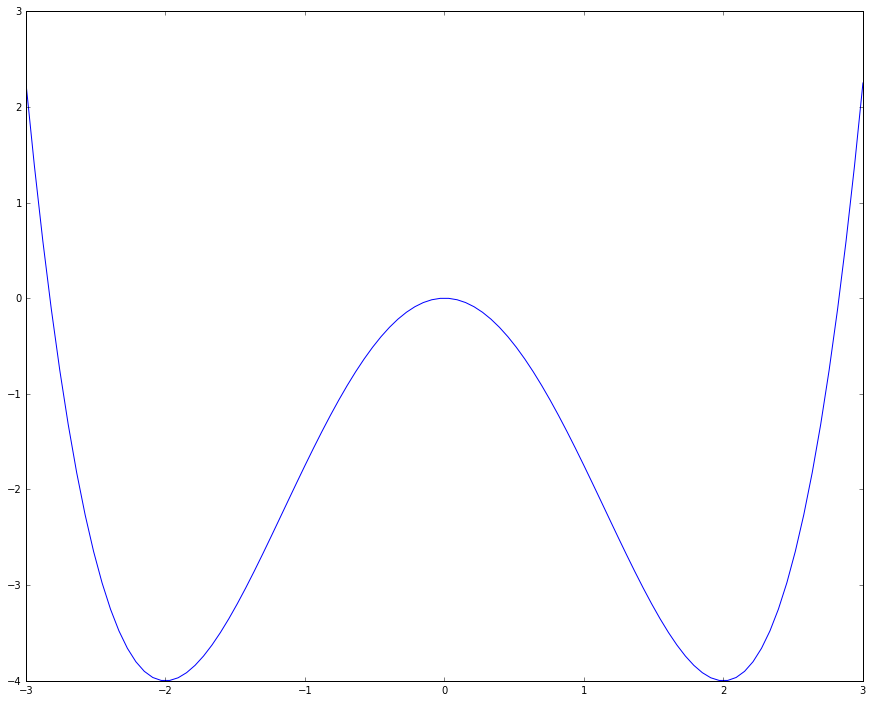

In [105]:
from numpy import cos, pi

#modelling an 1d duffing oscillator with friction, a double potential and a harmonic driving force
def model(friction, a, b, F0, omega):
    def potential(x): return b*x**4 - a*x**2
    def force(x, v, t): return -friction * v + 2*a*x - 4*b*x**3 + F0 * cos(1*t)
    
    return potential, force

U, F = model(friction = 0.6, a = 2, b = 1/4, F0 = 4.0, omega = 2.4)
T = 2*pi/2.4

x = np.linspace(-3,3,100)
plt.plot(x, U(x))

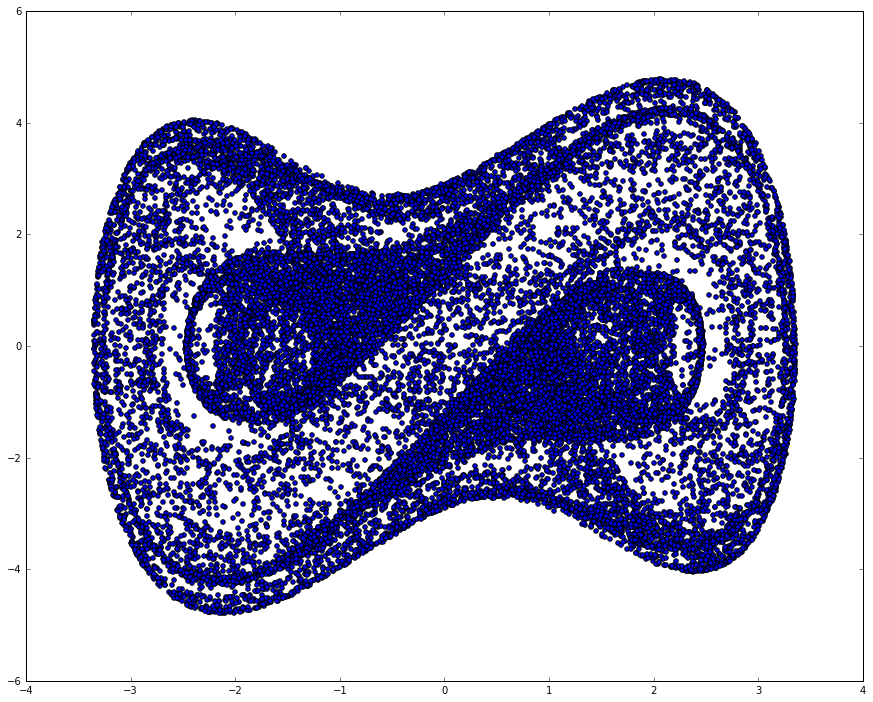

In [107]:
#define our state to be s = (x, v) tuples and define the function that computes the dervative of state
def D(s,t):
    x, v = s
    return (v, F(x, v, t))

#integrate this to get x as a function of t
N = 10000 #number of periods to compute over
n = 10 #number of samples per period

t = np.linspace(0, N*T, n*N*T)
s0 = (0.5, 0)

from scipy.integrate import odeint
ss = odeint(D, s0, t)
xs, vs = ss.T

plt.scatter(xs[::n], vs[::n])


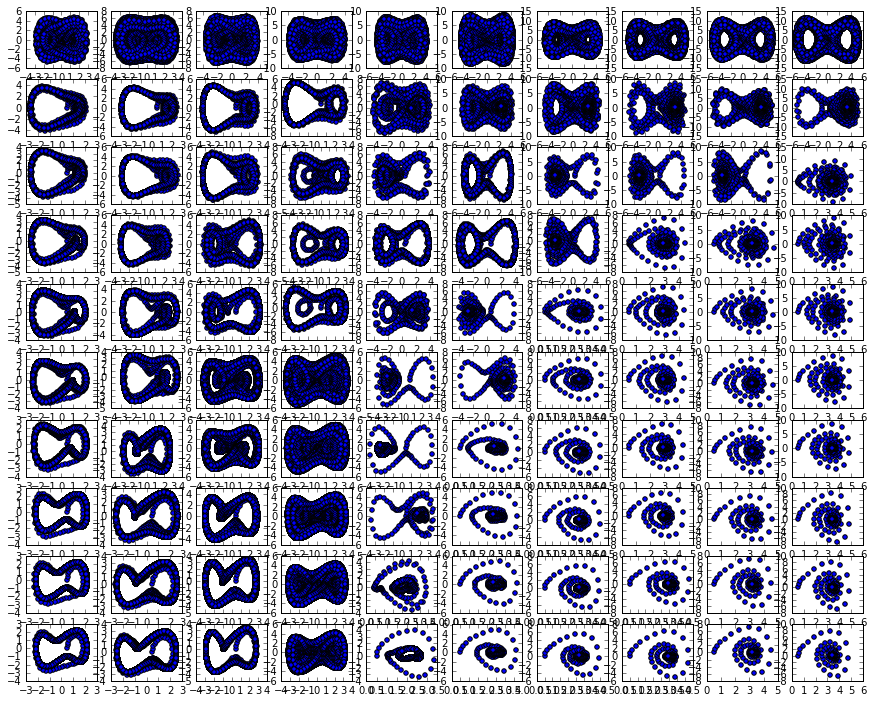

In [112]:
#integrate this to get x as a function of t
N = 1000 #number of periods to compute over
n = 10 #number of samples per period

t = np.linspace(0, N*T, n*N*T)
s0 = (0.5, 0)

gs = np.linspace(0, 0.8, 10)
as_ = np.linspace(0, 6, 10)

f, axes = plt.subplots(len(gs), len(as_))
for i in range(len(gs)):
    for j in range(len(as_)):
        U, F = model(friction = gs[i], a = as_[j], b = 1/4, F0 = 4.0, omega = 2.4)

        def D(s,t):
            x, v = s
            return (v, F(x, v, t))

        ss = odeint(D, s0, t)
        xs, vs = ss.T
        axes[i][j].scatter(xs[::], vs[::])
